# Task of 29 Oct Live Class
**Completed By Saurabh Sharma**

Wine Datase: https://raw.githubusercontent.com/aniruddhachoudhury/Red-Wine-Quality/master/winequality-red.csv

Admition Dataset: https://raw.githubusercontent.com/srinivasav22/Graduate-Admission-Prediction/master/Admission_Predict_Ver1.1.csv

## What To do in Task
    - Load Datasets from the URLs
    - EDA
    - Preprocession
    - Feature Engenering
    - Model Training (SVC)
        - Performance Matrix
        - Confusion Matrix
        - AUC and ROC 
    
    - Model Training (SVR)
        - Score

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline


from sklearn.preprocessing import StandardScaler
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn import svm
from sklearn.model_selection import GridSearchCV

import warnings
warnings.simplefilter("ignore")
warnings.filterwarnings("ignore");

C:\Users\acer\anaconda3\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.2
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


## Making Path for the Datasets

In [2]:
WineDataPath = "https://raw.githubusercontent.com/aniruddhachoudhury/Red-Wine-Quality/master/winequality-red.csv"
AdmisionDataPath = "https://raw.githubusercontent.com/srinivasav22/Graduate-Admission-Prediction/master/Admission_Predict_Ver1.1.csv"

# Loading the Datasets

In [3]:
WineData = pd.read_csv(WineDataPath)
WD = pd.read_csv(WineDataPath)
AdmitData = pd.read_csv(AdmisionDataPath)

## Wine Quality Dataset

In [4]:
WineData.sample(5)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
502,10.4,0.44,0.73,6.55,0.074,38.0,76.0,0.99900,3.17,0.85,12.0,7
254,7.1,0.60,0.00,1.80,0.074,16.0,34.0,0.99720,3.47,0.70,9.9,6
521,7.6,0.41,0.49,2.00,0.088,16.0,43.0,0.99800,3.48,0.64,9.1,5
957,9.5,0.37,0.52,2.00,0.088,12.0,51.0,0.99613,3.29,0.58,11.1,6
22,7.9,0.43,0.21,1.60,0.106,10.0,37.0,0.99660,3.17,0.91,9.5,5


## Admition Dataset

In [5]:
AdmitData.sample(5)

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
406,407,322,103,4,3.0,2.5,8.02,1,0.61
237,238,329,114,5,4.5,5.0,9.19,1,0.86
484,485,317,106,3,3.5,3.0,7.89,1,0.73
25,26,340,120,5,4.5,4.5,9.60,1,0.94
385,386,335,117,5,5.0,5.0,9.82,1,0.96


# EDA (Exploratory Data Analysis)

## EDA for Wine Dataset

### Striping the Column Names If any

In [6]:
WineData.columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality'],
      dtype='object')

In [7]:
[i.strip() for i in WineData.columns]

['fixed acidity',
 'volatile acidity',
 'citric acid',
 'residual sugar',
 'chlorides',
 'free sulfur dioxide',
 'total sulfur dioxide',
 'density',
 'pH',
 'sulphates',
 'alcohol',
 'quality']

### Checking the Numerical and Categorical Columns

In [8]:
WineDataNumericalFeatures = [feature for feature in WineData.columns if WineData[feature].dtype != 'O']
WineDataCategoricalFeatures = [feature for feature in WineData.columns if WineData[feature].dtype == 'O']

print(f"We have {len(WineDataNumericalFeatures)} Numerical Features: {WineDataNumericalFeatures}")
print(f"We have {len(WineDataCategoricalFeatures)} Categorical Features: {WineDataCategoricalFeatures}")

We have 12 Numerical Features: ['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar', 'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density', 'pH', 'sulphates', 'alcohol', 'quality']
We have 0 Categorical Features: []


**As above we can see that there are only Numerical Features are present in this Wine Dataset**

### Univariate Analysis

The term univariate anlaysis refers to the analysis of one varaible prefix "uni" means "one". The purpose of univariate analysis is to understand the distribution of values for a single variable.

#### We have only Numerical Features

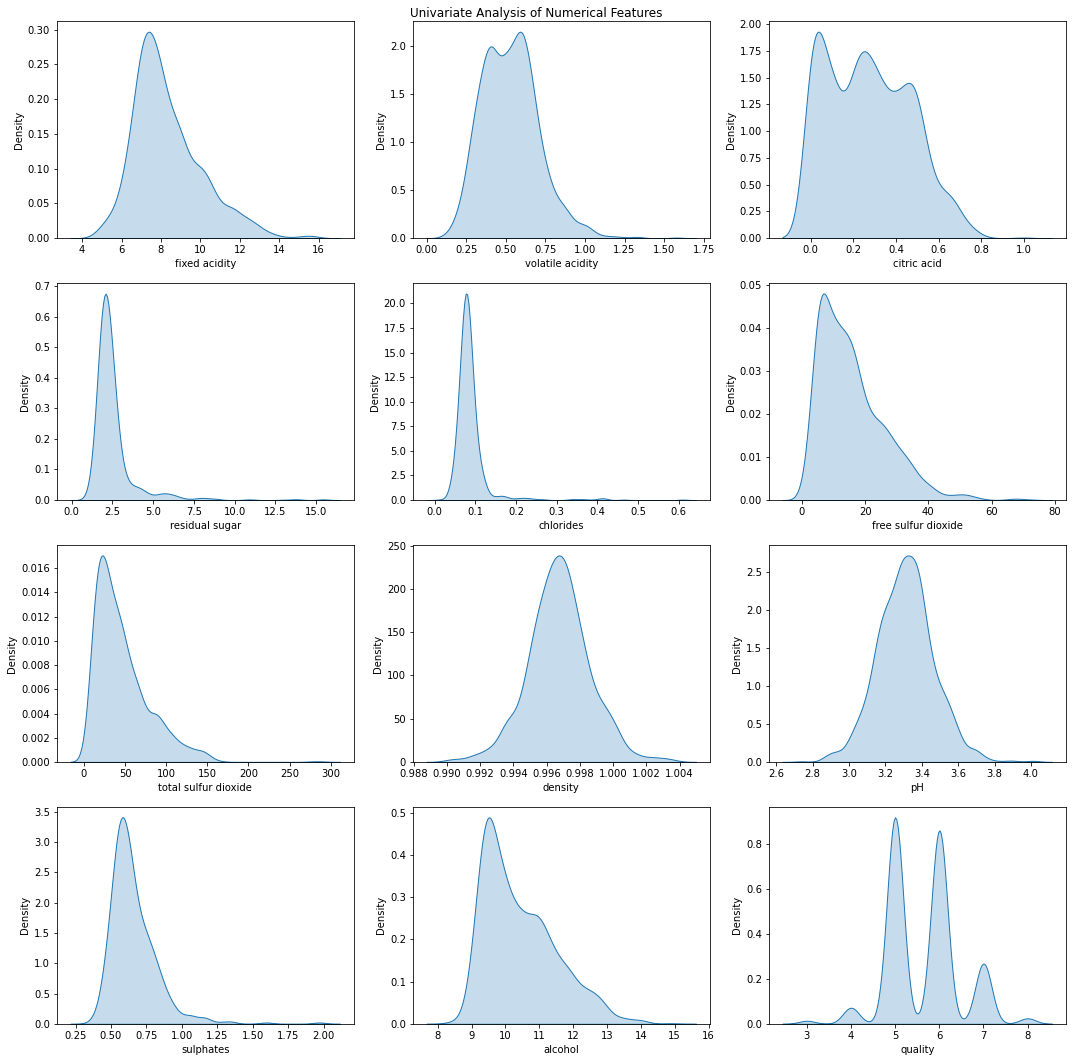

In [9]:
plt.figure(figsize=(15, 15))
plt.suptitle("Univariate Analysis of Numerical Features")

for i in range(0, len(WineDataNumericalFeatures)):
    plt.subplot(4, 3, i+1)
    sns.kdeplot(x=WineData[WineDataNumericalFeatures[i]], shade=True)
    plt.xlabel(WineDataNumericalFeatures[i])
    plt.ylabel("Density")
    plt.tight_layout();

**Wine Dataset is Skewed Dataset**

### Multivariate Analysis
Multivariate analysis is the analysis of more than one variable.

#### Checking Multicolinearity in Numerical Features

In [10]:
WineData[(WineData.columns)].corr()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
fixed acidity,1.000000,-0.256131,0.671703,0.114777,0.093705,-0.153794,-0.113181,0.668047,-0.682978,0.183006,-0.061668,0.124052
volatile acidity,-0.256131,1.000000,-0.552496,0.001918,0.061298,-0.010504,0.076470,0.022026,0.234937,-0.260987,-0.202288,-0.390558
citric acid,0.671703,-0.552496,1.000000,0.143577,0.203823,-0.060978,0.035533,0.364947,-0.541904,0.312770,0.109903,0.226373
residual sugar,0.114777,0.001918,0.143577,1.000000,0.055610,0.187049,0.203028,0.355283,-0.085652,0.005527,0.042075,0.013732
chlorides,0.093705,0.061298,0.203823,0.055610,1.000000,0.005562,0.047400,0.200632,-0.265026,0.371260,-0.221141,-0.128907
free sulfur dioxide,-0.153794,-0.010504,-0.060978,0.187049,0.005562,1.000000,0.667666,-0.021946,0.070377,0.051658,-0.069408,-0.050656
total sulfur dioxide,-0.113181,0.076470,0.035533,0.203028,0.047400,0.667666,1.000000,0.071269,-0.066495,0.042947,-0.205654,-0.185100
density,0.668047,0.022026,0.364947,0.355283,0.200632,-0.021946,0.071269,1.000000,-0.341699,0.148506,-0.496180,-0.174919
pH,-0.682978,0.234937,-0.541904,-0.085652,-0.265026,0.070377,-0.066495,-0.341699,1.000000,-0.196648,0.205633,-0.057731
sulphates,0.183006,-0.260987,0.312770,0.005527,0.371260,0.051658,0.042947,0.148506,-0.196648,1.000000,0.093595,0.251397


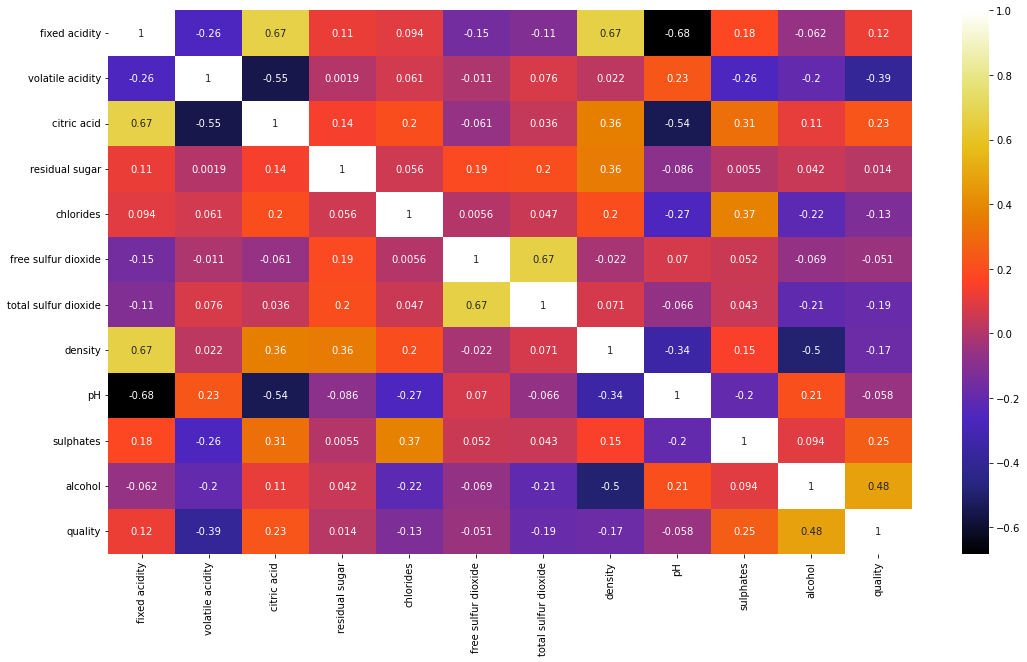

In [11]:
plt.figure(figsize=(18, 10))
sns.heatmap(WineData.corr(), cmap="CMRmap", annot=True)
plt.show()

### Checking Outliers for Wine Dataset

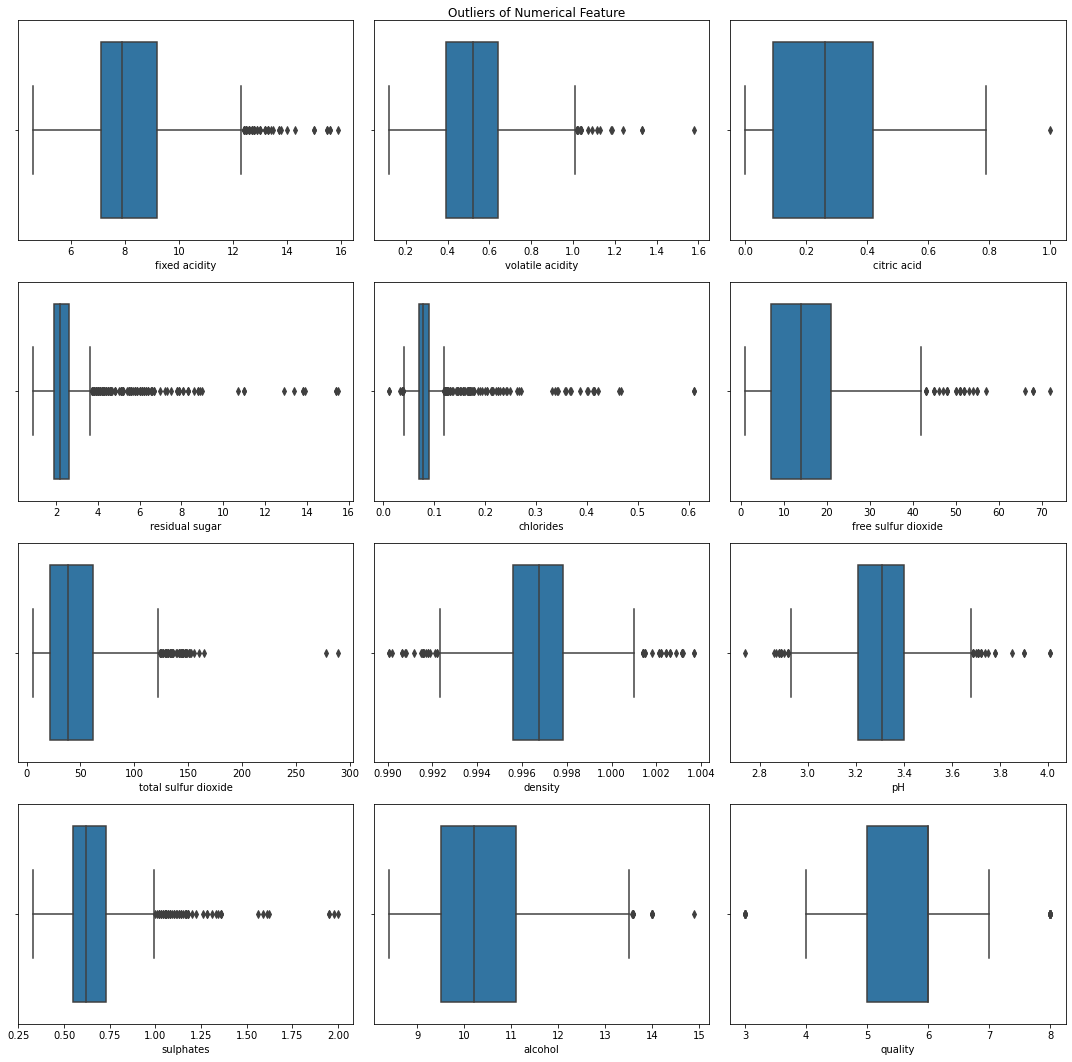

In [12]:
plt.figure(figsize=(15, 15))
plt.suptitle("Outliers of Numerical Feature")

for i in range(0, len(WineDataNumericalFeatures)):
    plt.subplot(4, 3, i+1)
    sns.boxplot(x=WineData[WineDataNumericalFeatures[i]])
    plt.xlabel(WineDataNumericalFeatures[i])
    # plt.ylabel("Density")
    plt.tight_layout();

**As we can see there are many outliers present in the Wine Data**

## EDA for Admition Dataset

### Striping the Column Names If any

In [13]:
AdmitData.columns

Index(['Serial No.', 'GRE Score', 'TOEFL Score', 'University Rating', 'SOP',
       'LOR ', 'CGPA', 'Research', 'Chance of Admit '],
      dtype='object')

In [14]:
AdmitData.columns = [i.strip() for i in AdmitData.columns]
AdmitData.columns

Index(['Serial No.', 'GRE Score', 'TOEFL Score', 'University Rating', 'SOP',
       'LOR', 'CGPA', 'Research', 'Chance of Admit'],
      dtype='object')

### Checking the Numerical and Categorical Columns

In [15]:
AdmitDataNumericalFeatures = [feature for feature in AdmitData.columns if AdmitData[feature].dtype != 'O']
AdmitDataCategoricalFeature = [feature for feature in AdmitData.columns if AdmitData[feature].dtype == 'O']

print(f"We have {len(AdmitDataNumericalFeatures)} Numerical Features: {AdmitDataNumericalFeatures}")
print(f"We have {len(AdmitDataCategoricalFeature)} Categorical Features: {AdmitDataCategoricalFeature}")

We have 9 Numerical Features: ['Serial No.', 'GRE Score', 'TOEFL Score', 'University Rating', 'SOP', 'LOR', 'CGPA', 'Research', 'Chance of Admit']
We have 0 Categorical Features: []


**As above we can see that there are only Numerical Features in Admition Dataset Also**

### Univariate Analysis

The term univariate analysis refers to the analusis of one variable prefix "uni" means "one". The purpose of univariate analysis is to understand the distribution of values for a single variable.

#### We have only Numerical Features

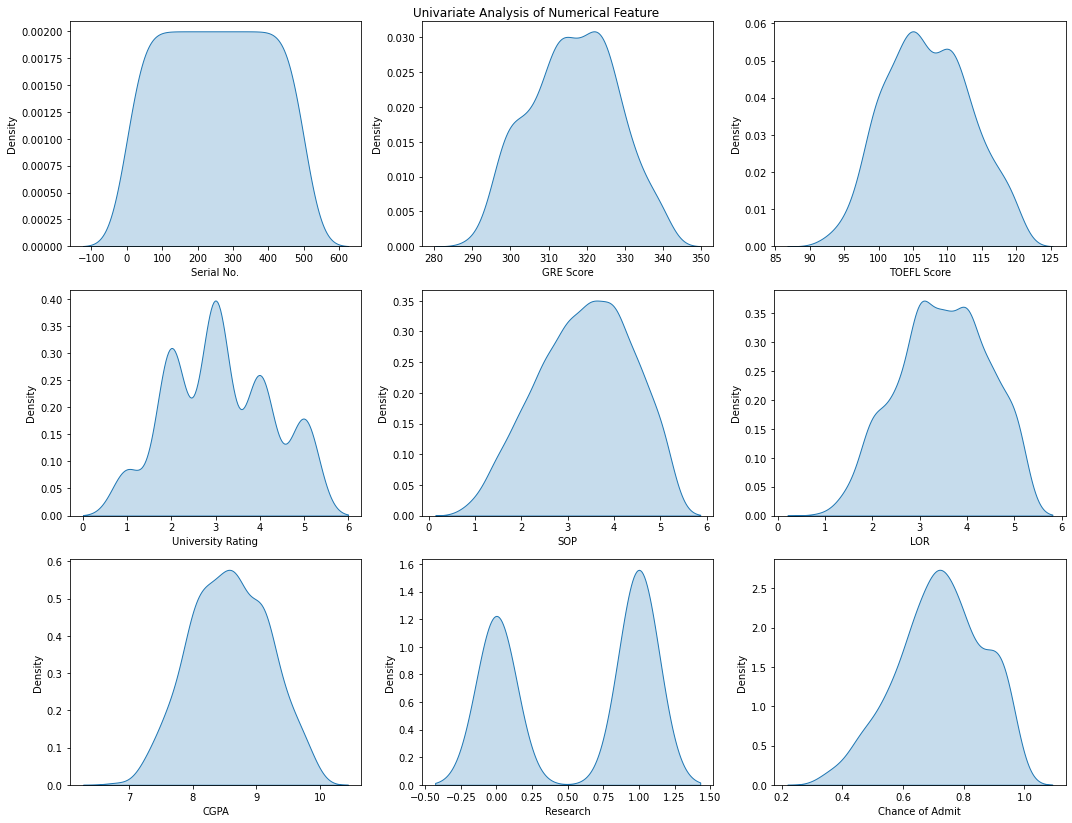

In [16]:
plt.figure(figsize=(15, 15))
plt.suptitle("Univariate Analysis of Numerical Feature")

for i in range(0, len(AdmitDataNumericalFeatures)):
    plt.subplot(4, 3, i+1)
    sns.kdeplot(x=AdmitData[AdmitDataNumericalFeatures[i]], shade=True)
    plt.xlabel(AdmitDataNumericalFeatures[i])
    plt.ylabel("Density")
    plt.tight_layout();

**Admition Data seems like Normal Distribution**

### Multivariate Analysis
Multivariate analysis is the analysis of more than one variable.

#### Checking Multicolinearity in Numerical Features

In [17]:
AdmitData[(AdmitData.columns)].corr()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
Serial No.,1.000000,-0.103839,-0.141696,-0.067641,-0.137352,-0.003694,-0.074289,-0.005332,0.008505
GRE Score,-0.103839,1.000000,0.827200,0.635376,0.613498,0.524679,0.825878,0.563398,0.810351
TOEFL Score,-0.141696,0.827200,1.000000,0.649799,0.644410,0.541563,0.810574,0.467012,0.792228
University Rating,-0.067641,0.635376,0.649799,1.000000,0.728024,0.608651,0.705254,0.427047,0.690132
SOP,-0.137352,0.613498,0.644410,0.728024,1.000000,0.663707,0.712154,0.408116,0.684137
LOR,-0.003694,0.524679,0.541563,0.608651,0.663707,1.000000,0.637469,0.372526,0.645365
CGPA,-0.074289,0.825878,0.810574,0.705254,0.712154,0.637469,1.000000,0.501311,0.882413
Research,-0.005332,0.563398,0.467012,0.427047,0.408116,0.372526,0.501311,1.000000,0.545871
Chance of Admit,0.008505,0.810351,0.792228,0.690132,0.684137,0.645365,0.882413,0.545871,1.000000


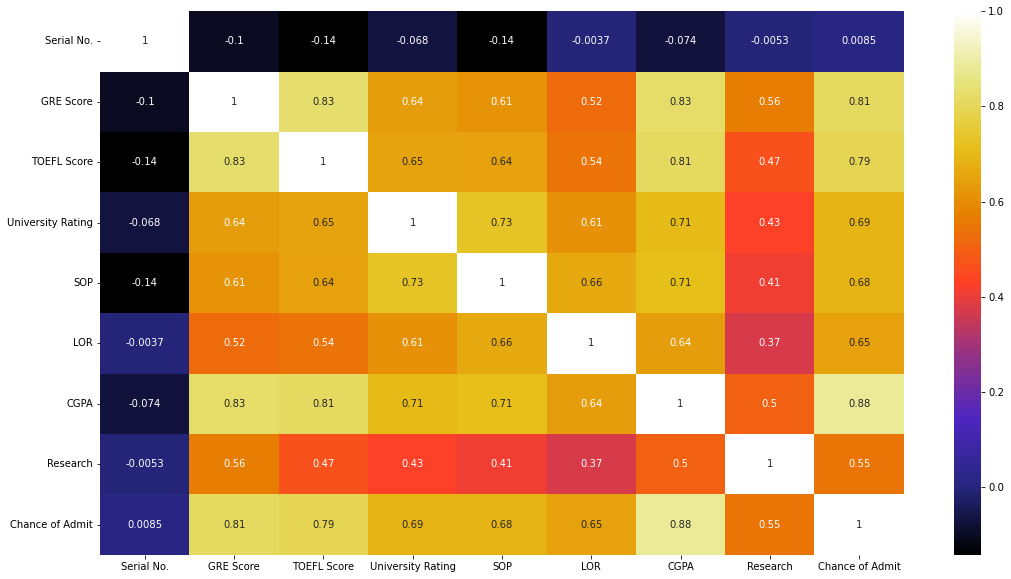

In [18]:
plt.figure(figsize=(18, 10))
sns.heatmap(AdmitData.corr(), cmap="CMRmap", annot=True)
plt.show()

### Checking Outliers

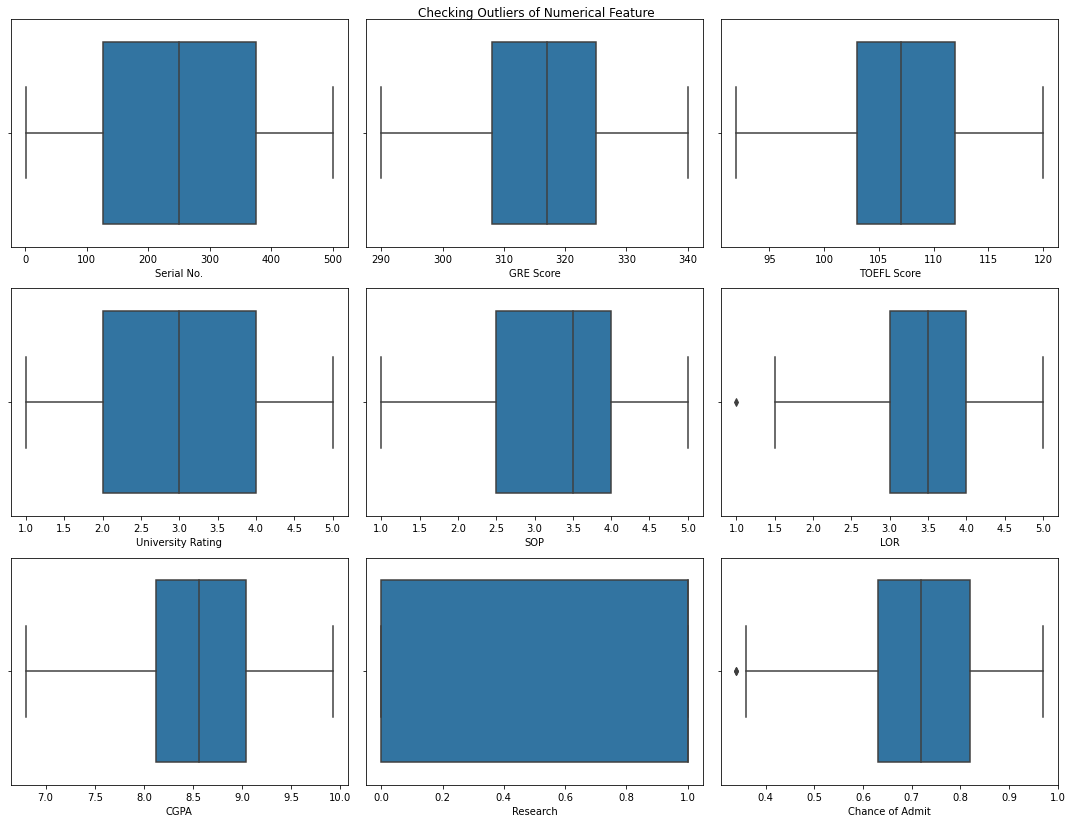

In [19]:
plt.figure(figsize=(15, 15))
plt.suptitle("Checking Outliers of Numerical Feature")

for i in range(0, len(AdmitDataNumericalFeatures)):
    plt.subplot(4, 3, i+1)
    sns.boxplot(x=AdmitData[AdmitDataNumericalFeatures[i]])
    plt.xlabel(AdmitDataNumericalFeatures[i])
    # plt.ylabel("Density")
    plt.tight_layout();

# Preprocession the Data

## Preprocessing of Wine Dataset

### Removing Outliers

In [20]:
MaxFixedAcidity = int(WineData['fixed acidity'].quantile(0.96))
MinFixedAcidity = int(WineData['fixed acidity'].quantile(0.1))
print("Maximum Limit: ", MaxFixedAcidity)
print("Minimum Limit: ", MinFixedAcidity)

WineDataMeanFixedAcidity = int(WineData.loc[WineData['fixed acidity']<=12, 'fixed acidity'].mean())
print("\nMean: ", WineDataMeanFixedAcidity)

WineData['fixed acidity'] = np.where(WineData['fixed acidity'] >= MaxFixedAcidity, WineDataMeanFixedAcidity, WineData['fixed acidity'])
WineData['fixed acidity'] = np.where(WineData['fixed acidity'] < MinFixedAcidity, WineDataMeanFixedAcidity, WineData['fixed acidity'])

Maximum Limit:  12
Minimum Limit:  6

Mean:  8


<AxesSubplot:xlabel='fixed acidity'>

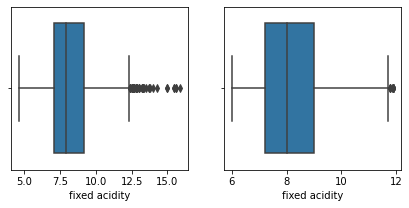

In [21]:
plt.figure(figsize=(7, 3))
plt.subplot(1, 2, 1)
sns.boxplot(WD['fixed acidity'])

plt.subplot(1, 2, 2)
sns.boxplot(WineData['fixed acidity'])

## Preprocessing of Admition Dataset

**In Admition Dataset Outliers are not present**

# Model Training

## Training for Wine Dataset

### Creating X and y for Wine Data

In [22]:
XWine = WineData.drop("quality", axis=1)
yWine = WineData["quality"]

print(f"Shape of XWine Data: {XWine.shape}")
print(f"Shape of yWine Data: {yWine.shape}")

Shape of XWine Data: (1599, 11)
Shape of yWine Data: (1599,)


### Train Test Split the Wine Data

In [23]:
Wine_X_train, Wine_X_test, Wine_y_train, Wine_y_test = train_test_split(XWine, yWine, test_size=0.30, random_state=42)

In [24]:
print(f"Wine X Train Shape: {Wine_X_train.shape}")
print(f"Wine X Test Shape: {Wine_X_test.shape}")
print(f"Wine y Train Shape: {Wine_y_train.shape}")
print(f"Wine y Test Shape: {Wine_y_test.shape}")

Wine X Train Shape: (1119, 11)
Wine X Test Shape: (480, 11)
Wine y Train Shape: (1119,)
Wine y Test Shape: (480,)


### Scalling Wine Data

In [25]:
WineScaler = StandardScaler()
WineScaler.fit(Wine_X_train)

StandardScaler()

In [26]:
Wine_X_train_tf = WineScaler.transform(Wine_X_train)
Wine_X_train_tf

array([[ 3.03294240e-01, -1.72107140e+00,  4.59303345e-01, ...,
         1.01180685e+00,  1.22661179e+00,  5.50057013e-01],
       [-1.57202713e-01, -4.01957443e-01,  1.84105501e+00, ...,
        -2.10687612e+00,  1.22661179e+00, -2.05174641e-01],
       [-7.71198651e-01,  3.77472102e-02, -1.28054303e-03, ...,
         4.92026353e-01,  2.97270776e-01,  5.50057013e-01],
       ...,
       [-7.71198651e-01,  4.77451864e-01, -1.07597628e+00, ...,
         1.27169710e+00, -6.90154049e-01, -8.66002338e-01],
       [-2.33952205e-01, -1.83099757e+00,  4.08127357e-01, ...,
         3.72184202e-02,  8.20025095e-01,  1.39969262e+00],
       [-1.57202713e-01, -1.33632983e+00, -5.24565306e-02, ...,
         4.92026353e-01, -6.90154049e-01,  2.91015593e+00]])

In [27]:
Wine_SVC_model = svm.SVC()
Wine_SVC_model.fit(Wine_X_train_tf, Wine_y_train)

SVC()

In [28]:
print(f"Traning Accuracy of Wine Data: {Wine_SVC_model.score(Wine_X_train_tf, Wine_y_train)}")

Traning Accuracy of Wine Data: 0.6791778373547811


In [29]:
Wine_y_pred = Wine_SVC_model.predict(WineScaler.transform(Wine_X_test))

In [30]:
print(f"Testing Accuracy of Wine Data: {metrics.accuracy_score(Wine_y_test, Wine_y_pred)}")

Testing Accuracy of Wine Data: 0.5979166666666667


In [31]:
print(f"Classification Report of Wine Data\n")
print(metrics.classification_report(Wine_y_test, Wine_y_pred))

Classification Report of Wine Data

              precision    recall  f1-score   support

           3       0.00      0.00      0.00         1
           4       0.00      0.00      0.00        17
           5       0.64      0.77      0.70       195
           6       0.56      0.59      0.58       200
           7       0.53      0.28      0.37        61
           8       0.00      0.00      0.00         6

    accuracy                           0.60       480
   macro avg       0.29      0.27      0.27       480
weighted avg       0.56      0.60      0.57       480



## Training for Admition Dataset

### Creating X and y for Admition Data

In [32]:
AdmitData.columns

Index(['Serial No.', 'GRE Score', 'TOEFL Score', 'University Rating', 'SOP',
       'LOR', 'CGPA', 'Research', 'Chance of Admit'],
      dtype='object')

In [33]:
XAdmit = AdmitData.drop("Chance of Admit", axis=1)
yAdmit = AdmitData["Chance of Admit"]

print(f"Shape of XAdmit Data: {XAdmit.shape}")
print(f"Shape of yAdmit Data: {yAdmit.shape}")

Shape of XAdmit Data: (500, 8)
Shape of yAdmit Data: (500,)


### Train Test Split the Admition Data

In [34]:
Admit_X_train, Admit_X_test, Admit_y_train, Admit_y_test = train_test_split(XAdmit, yAdmit, test_size=0.30, random_state=42)

In [35]:
print(f"Admition X Train Shape: {Admit_X_train.shape}")
print(f"Admition X Test Shape: {Admit_X_test.shape}")
print(f"Admition y Train Shape: {Admit_y_train.shape}")
print(f"Admition y Test Shape: {Admit_y_test.shape}")

Admition X Train Shape: (350, 8)
Admition X Test Shape: (150, 8)
Admition y Train Shape: (350,)
Admition y Test Shape: (150,)


### Scalling Admition Data

In [36]:
AdmitScaler = StandardScaler()
AdmitScaler.fit(Admit_X_train)

StandardScaler()

In [37]:
Admit_X_train_tf = AdmitScaler.transform(Admit_X_train)
Admit_X_train_tf

array([[-1.75020856,  1.22318504,  1.27980924, ..., -0.5291228 ,
         1.28550609,  0.88127734],
       [-0.96385041, -1.61322396, -0.86815536, ...,  0.01556244,
         0.07349047, -1.13471657],
       [-1.46683625,  0.49120853,  0.45366901, ...,  0.56024767,
         0.88150088,  0.88127734],
       ...,
       [ 0.67970895, -1.33873276, -1.3638395 , ..., -1.61849327,
        -2.23270591, -1.13471657],
       [ 1.29604372, -0.69825331, -0.37247122, ...,  0.56024767,
        -1.50886325, -1.13471657],
       [-1.06303072, -0.24076799, -0.20724318, ...,  0.01556244,
        -0.54935089, -1.13471657]])

In [38]:
Admit_SVR_model = svm.SVR()
Admit_SVR_model.fit(Admit_X_train_tf, Admit_y_train)

SVR()

In [39]:
print(f"Traning Accuracy of Admition Data: {Admit_SVR_model.score(Admit_X_train_tf, Admit_y_train)}")

Traning Accuracy of Admition Data: 0.8056236255122253


In [40]:
Admit_y_pred = Admit_SVR_model.predict(AdmitScaler.transform(Admit_X_test))

In [41]:
print(f"Mean Absolute Error: {metrics.mean_absolute_error(Admit_y_test, Admit_y_pred)}")
print(f"Mean squared error: , {metrics.mean_squared_error(Admit_y_test, Admit_y_pred)}")
print(f"Median absolute error: {metrics.median_absolute_error(Admit_y_test, Admit_y_pred)}")
print(f"Explain variance score: , {metrics.explained_variance_score(Admit_y_test, Admit_y_pred)}") 
print(f"R2 score: , {metrics.r2_score(Admit_y_test, Admit_y_pred)}")

Mean Absolute Error: 0.054483683833666634
Mean squared error: , 0.004598432360858017
Median absolute error: 0.04913018222582349
Explain variance score: , 0.8078910066096596
R2 score: , 0.779367688675496


# Hyperparameter Tunning

## GridSearchCV For Wine Data

In [42]:
WineParameters = {'C': [0.1, 1, 10, 100, 1000],
                 'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
                 'kernel': ['rbf']}

In [43]:
WineHyperparameter = GridSearchCV(svm.SVC(), WineParameters, refit=True, verbose=3)
WineHyperparameter.fit(Wine_X_train_tf, Wine_y_train)

Fitting 5 folds for each of 25 candidates, totalling 125 fits
[CV 1/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.433 total time=   0.2s
[CV 2/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.433 total time=   0.2s
[CV 3/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.433 total time=   0.2s
[CV 4/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.438 total time=   0.2s
[CV 5/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.435 total time=   0.3s
[CV 1/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.571 total time=   0.1s
[CV 2/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.554 total time=   0.2s
[CV 3/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.580 total time=   0.1s
[CV 4/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.607 total time=   0.1s
[CV 5/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.650 total time=   0.1s
[CV 1/5] END .....C=0.1, gamma=0.01, kernel=rbf;, score=0.531 total time=   0.2s
[CV 2/5] END .....C=0.1, gamma=0.01, kernel=rbf

[CV 2/5] END .......C=1000, gamma=1, kernel=rbf;, score=0.629 total time=   0.2s
[CV 3/5] END .......C=1000, gamma=1, kernel=rbf;, score=0.603 total time=   0.2s
[CV 4/5] END .......C=1000, gamma=1, kernel=rbf;, score=0.665 total time=   0.2s
[CV 5/5] END .......C=1000, gamma=1, kernel=rbf;, score=0.664 total time=   0.2s
[CV 1/5] END .....C=1000, gamma=0.1, kernel=rbf;, score=0.616 total time=   0.3s
[CV 2/5] END .....C=1000, gamma=0.1, kernel=rbf;, score=0.616 total time=   0.2s
[CV 3/5] END .....C=1000, gamma=0.1, kernel=rbf;, score=0.598 total time=   0.3s
[CV 4/5] END .....C=1000, gamma=0.1, kernel=rbf;, score=0.621 total time=   0.3s
[CV 5/5] END .....C=1000, gamma=0.1, kernel=rbf;, score=0.650 total time=   0.3s
[CV 1/5] END ....C=1000, gamma=0.01, kernel=rbf;, score=0.594 total time=   0.4s
[CV 2/5] END ....C=1000, gamma=0.01, kernel=rbf;, score=0.621 total time=   0.6s
[CV 3/5] END ....C=1000, gamma=0.01, kernel=rbf;, score=0.643 total time=   0.4s
[CV 4/5] END ....C=1000, gam

GridSearchCV(estimator=SVC(),
             param_grid={'C': [0.1, 1, 10, 100, 1000],
                         'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
                         'kernel': ['rbf']},
             verbose=3)

In [44]:
print(f"Best Parameters: {WineHyperparameter.best_params_}")
print(f"Best Estimators: {WineHyperparameter.best_estimator_}")

Best Parameters: {'C': 1, 'gamma': 1, 'kernel': 'rbf'}
Best Estimators: SVC(C=1, gamma=1)


In [45]:
WineHyperPred = WineHyperparameter.predict(WineScaler.transform(Wine_X_test))
print("Classification Report of Wine Hyperparameter Model\n")
print(metrics.classification_report(Wine_y_test, WineHyperPred))

Classification Report of Wine Hyperparameter Model

              precision    recall  f1-score   support

           3       0.00      0.00      0.00         1
           4       0.00      0.00      0.00        17
           5       0.68      0.69      0.69       195
           6       0.57      0.72      0.64       200
           7       0.73      0.31      0.44        61
           8       0.00      0.00      0.00         6

    accuracy                           0.62       480
   macro avg       0.33      0.29      0.29       480
weighted avg       0.61      0.62      0.60       480



### Accuracy has been Increased by 2% after Hyperparameter in Wine Data

## GridSearchCV for Admition Data

In [46]:
AdmitParameters = {'kernel': ('linear', 'rbf', 'poly'),
                  'C': [1.5, 10],
                  'gamma': [1e-7, 1e-4],
                  'epsilon': [0.1,0.2,0.5,0.3]}

In [47]:
AdmitHyperparameter = GridSearchCV(svm.SVR(), AdmitParameters, refit=True, verbose=3)
AdmitHyperparameter.fit(Admit_X_train_tf, Admit_y_train)

Fitting 5 folds for each of 48 candidates, totalling 240 fits
[CV 1/5] END C=1.5, epsilon=0.1, gamma=1e-07, kernel=linear;, score=0.733 total time=   0.0s
[CV 2/5] END C=1.5, epsilon=0.1, gamma=1e-07, kernel=linear;, score=0.848 total time=   0.0s
[CV 3/5] END C=1.5, epsilon=0.1, gamma=1e-07, kernel=linear;, score=0.707 total time=   0.0s
[CV 4/5] END C=1.5, epsilon=0.1, gamma=1e-07, kernel=linear;, score=0.821 total time=   0.0s
[CV 5/5] END C=1.5, epsilon=0.1, gamma=1e-07, kernel=linear;, score=0.831 total time=   0.0s
[CV 1/5] END C=1.5, epsilon=0.1, gamma=1e-07, kernel=rbf;, score=-0.088 total time=   0.0s
[CV 2/5] END C=1.5, epsilon=0.1, gamma=1e-07, kernel=rbf;, score=-0.005 total time=   0.0s
[CV 3/5] END C=1.5, epsilon=0.1, gamma=1e-07, kernel=rbf;, score=0.001 total time=   0.0s
[CV 4/5] END C=1.5, epsilon=0.1, gamma=1e-07, kernel=rbf;, score=-0.001 total time=   0.0s
[CV 5/5] END C=1.5, epsilon=0.1, gamma=1e-07, kernel=rbf;, score=-0.011 total time=   0.0s
[CV 1/5] END C=1.5,

[CV 1/5] END C=1.5, epsilon=0.3, gamma=1e-07, kernel=linear;, score=-0.052 total time=   0.0s
[CV 2/5] END C=1.5, epsilon=0.3, gamma=1e-07, kernel=linear;, score=-0.141 total time=   0.0s
[CV 3/5] END C=1.5, epsilon=0.3, gamma=1e-07, kernel=linear;, score=-0.329 total time=   0.0s
[CV 4/5] END C=1.5, epsilon=0.3, gamma=1e-07, kernel=linear;, score=-0.181 total time=   0.0s
[CV 5/5] END C=1.5, epsilon=0.3, gamma=1e-07, kernel=linear;, score=-0.202 total time=   0.0s
[CV 1/5] END C=1.5, epsilon=0.3, gamma=1e-07, kernel=rbf;, score=-0.081 total time=   0.0s
[CV 2/5] END C=1.5, epsilon=0.3, gamma=1e-07, kernel=rbf;, score=-0.147 total time=   0.0s
[CV 3/5] END C=1.5, epsilon=0.3, gamma=1e-07, kernel=rbf;, score=-0.369 total time=   0.0s
[CV 4/5] END C=1.5, epsilon=0.3, gamma=1e-07, kernel=rbf;, score=-0.237 total time=   0.0s
[CV 5/5] END C=1.5, epsilon=0.3, gamma=1e-07, kernel=rbf;, score=-0.234 total time=   0.0s
[CV 1/5] END C=1.5, epsilon=0.3, gamma=1e-07, kernel=poly;, score=-0.082 to

[CV 5/5] END C=10, epsilon=0.3, gamma=1e-07, kernel=rbf;, score=-0.234 total time=   0.0s
[CV 1/5] END C=10, epsilon=0.3, gamma=1e-07, kernel=poly;, score=-0.082 total time=   0.0s
[CV 2/5] END C=10, epsilon=0.3, gamma=1e-07, kernel=poly;, score=-0.147 total time=   0.0s
[CV 3/5] END C=10, epsilon=0.3, gamma=1e-07, kernel=poly;, score=-0.369 total time=   0.0s
[CV 4/5] END C=10, epsilon=0.3, gamma=1e-07, kernel=poly;, score=-0.237 total time=   0.0s
[CV 5/5] END C=10, epsilon=0.3, gamma=1e-07, kernel=poly;, score=-0.234 total time=   0.0s
[CV 1/5] END C=10, epsilon=0.3, gamma=0.0001, kernel=linear;, score=-0.052 total time=   0.0s
[CV 2/5] END C=10, epsilon=0.3, gamma=0.0001, kernel=linear;, score=-0.141 total time=   0.0s
[CV 3/5] END C=10, epsilon=0.3, gamma=0.0001, kernel=linear;, score=-0.329 total time=   0.0s
[CV 4/5] END C=10, epsilon=0.3, gamma=0.0001, kernel=linear;, score=-0.181 total time=   0.0s
[CV 5/5] END C=10, epsilon=0.3, gamma=0.0001, kernel=linear;, score=-0.202 tota

GridSearchCV(estimator=SVR(),
             param_grid={'C': [1.5, 10], 'epsilon': [0.1, 0.2, 0.5, 0.3],
                         'gamma': [1e-07, 0.0001],
                         'kernel': ('linear', 'rbf', 'poly')},
             verbose=3)

In [48]:
print(f"Best Parameters: {AdmitHyperparameter.best_params_}")
print(f"Best Estimators: {AdmitHyperparameter.best_estimator_}")

Best Parameters: {'C': 10, 'epsilon': 0.1, 'gamma': 1e-07, 'kernel': 'linear'}
Best Estimators: SVR(C=10, gamma=1e-07, kernel='linear')


In [49]:
AdmitHyperPred = AdmitHyperparameter.predict(AdmitScaler.transform(Admit_X_test))

print(f"Mean Absolute Error: {metrics.mean_absolute_error(Admit_y_test, AdmitHyperPred)}")
print(f"Mean squared error: , {metrics.mean_squared_error(Admit_y_test, AdmitHyperPred)}")
print(f"Median absolute error: {metrics.median_absolute_error(Admit_y_test, AdmitHyperPred)}")
print(f"Explain variance score: , {metrics.explained_variance_score(Admit_y_test, AdmitHyperPred)}") 
print(f"R2 score: , {metrics.r2_score(Admit_y_test, AdmitHyperPred)}")

Mean Absolute Error: 0.04615700781976919
Mean squared error: , 0.0037723436634162642
Median absolute error: 0.034757142699974375
Explain variance score: , 0.8209221627696607
R2 score: , 0.8190033393435455


### Accuracy has been Increased by 4% after Hyperparameter in Wine Data

#### WineData_SVC = 60% Accuracy
#### WineData_SVC_Hyperparameter = 62%
#### AdmitData_SVR = 77.93% R2score
#### AdmitData_SVR_Hyperparameter = 81.90% R2score


# Thank You